<a href="https://colab.research.google.com/github/lawlete/Varios/blob/main/Procesamiento_de_Lenguaje_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Procesamiento de Lenguaje Natural (NLP)**

Utiliza Python y una librería como Hugging Face Transformers para entrenar un modelo que realice una tarea de clasificación de texto (por ejemplo, clasificación de opiniones: positiva o negativa). Proporciona un conjunto de datos de ejemplo (puede ser un pequeño conjunto de datos de reseñas) y demuestra cómo entrenar el modelo, evaluarlo y ajustarlo.

Paso 1: Instalación de dependencias
Primero, instala las librerías necesarias

In [6]:
!pip install python-dotenv
!pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Cargamos la API TOKEN de Hugging Face**

In [8]:
from dotenv import load_dotenv, find_dotenv
import os
# Verifica y carga el file con las variables de entorno si existe
if load_dotenv(find_dotenv()):
    if "HF_TOKEN" in os.environ: # Verifica que existe la variable HF_KEY
        print("HUGGING FACE API TOKEN cargada") # Imprime el mensaje Si existe la variable de OpenAI
    else:
        print("No se cargo la api_key de HUGGING FACE, debera cargarla manualmente")
else:
      print("No se cargo la api_key, debera cargarla manualmente")

HUGGING FACE API TOKEN cargada


Paso 2: Cargar un conjunto de datos
Utilizaremos el conjunto de datos IMDB, que contiene reseñas de películas etiquetadas como positivas (1) o negativas (0). Este conjunto de datos está disponible en la librería datasets de Hugging Face.

In [9]:
from datasets import load_dataset

# Cargar el conjunto de datos IMDB
dataset = load_dataset("imdb")

# Ver la estructura del dataset
print(dataset)

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


**Paso 3: Preprocesamiento de los datos
Tokenizamos el texto utilizando un tokenizador preentrenado de Hugging Face.**

**En este caso, usaremos el modelo distilbert-base-uncased.**

**Lista de modelos para usar: **

1. **BERT (Bidirectional Encoder Representations from Transformers)**:
   - `bert-base-uncased`: La versión base de BERT sin distinción de mayúsculas y minúsculas.
   - `bert-large-uncased`: Una versión más grande de BERT sin distinción de mayúsculas y minúsculas.
   - `bert-base-cased`: La versión base de BERT con distinción de mayúsculas y minúsculas.
   - `bert-large-cased`: Una versión más grande de BERT con distinción de mayúsculas y minúsculas.

2. **RoBERTa (Robustly Optimized BERT approach)**:
   - `roberta-base`: La versión base de RoBERTa.
   - `roberta-large`: Una versión más grande de RoBERTa.

3. **AlBERT (A Lite BERT)**:
   - `albert-base-v2`: La versión base de AlBERT.
   - `albert-large-v2`: Una versión más grande de AlBERT.

4. **XLNet**:
   - `xlnet-base-cased`: La versión base de XLNet con distinción de mayúsculas y minúsculas.
   - `xlnet-large-cased`: Una versión más grande de XLNet con distinción de mayúsculas y minúsculas.

5. **ELECTRA (Efficiently Learning an Encoder that Classifies Token Replacements Accurately)**:
   - `electra-base-uncased`: La versión base de ELECTRA sin distinción de mayúsculas y minúsculas.
   - `electra-large-uncased`: Una versión más grande de ELECTRA sin distinción de mayúsculas y minúsculas.

6. **DeBERTa (Decoding-enhanced BERT with disentangled attention)**:
   - `deberta-base`: La versión base de DeBERTa.
   - `deberta-large`: Una versión más grande de DeBERTa.

7. **Longformer**:
   - `longformer-base-4096`: La versión base de Longformer, diseñada para manejar secuencias largas.
   - `longformer-large-4096`: Una versión más grande de Longformer.

8. **BigBird**:
   - `bigbird-roberta-base`: La versión base de BigBird, diseñada para manejar secuencias largas.
   - `bigbird-roberta-large`: Una versión más grande de BigBird.

9. **TinyBERT**:
   - `tiny-bert-base-uncased`: Una versión más pequeña y rápida de BERT sin distinción de mayúsculas y minúsculas.

10. **MobileBERT**:
    - `mobilebert-uncased`: Una versión más pequeña y rápida de BERT sin distinción de mayúsculas y minúsculas.



In [10]:
from transformers import AutoTokenizer

#
# Modelos posibles a usar listado arriba
#

modelo = "distilbert-base-uncased"

# Cargar el tokenizador
tokenizer = AutoTokenizer.from_pretrained(modelo)

# Función para tokenizar el texto
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding=True)

# Aplicar tokenización al dataset
tokenized_dataset = dataset.map(preprocess_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

**Paso 4: Dividir el conjunto de datos
Dividimos el conjunto de datos en entrenamiento y evaluación.**

In [11]:
# Dividir el dataset en entrenamiento y evaluación
train_dataset = tokenized_dataset["train"].shuffle(seed=42).select(range(100))  # Usamos solo 100 muestras para entrenamiento rápido
eval_dataset = tokenized_dataset["test"].shuffle(seed=42).select(range(10))    # Usamos 10 muestras para evaluación

**Paso 5: Entrenar el modelo**

**Cargamos un modelo preentrenado y lo ajustamos para la tarea de clasificación.**

In [12]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

In [13]:


# Cargar el modelo preentrenado
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Configurar los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Crear el Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Entrenar el modelo
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: alfredolawler (alfredolawler-lawer-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,No log,0.707512
2,No log,0.681677
3,No log,0.671206


TrainOutput(global_step=21, training_loss=0.6708961214338031, metrics={'train_runtime': 1087.9219, 'train_samples_per_second': 0.276, 'train_steps_per_second': 0.019, 'total_flos': 39740219596800.0, 'train_loss': 0.6708961214338031, 'epoch': 3.0})

**Paso 6: Evaluar el modelo**

**Evaluamos el modelo en el conjunto de evaluación.**

In [16]:
# Evaluar el modelo
eval_results = trainer.evaluate()
print(f"Precisión: {eval_results['eval_loss']}")

Precisión: 0.6712064146995544


**Graficos de evolucion del entrenamiento**

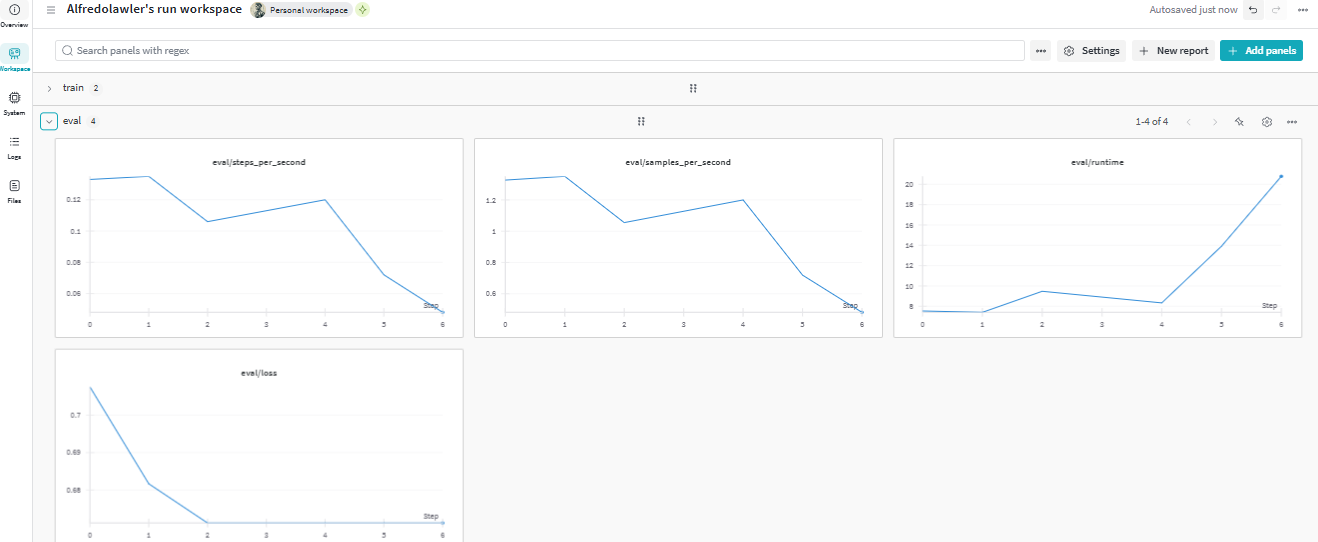

**Paso 7: Realizar predicciones**

**Podemos usar el modelo entrenado para clasificar nuevas reseñas.**  

In [28]:
# Función para predecir la clase de un texto
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    predictions = outputs.logits.argmax(dim=-1)
    return "Positiva" if predictions == 1 else "Negativa"

# Probamos el modelo entrenado con una lista de comentarios

comentarios = [
        "I loved this movie, it was amazing!",
        "Terrible film, I hated it.",
        "The acting was great, but the plot was boring.",
        "Absolutely fantastic!",
        "Worst movie ever.",
        "The movie was horrible, terribly bad.",
        "This movie was fantastic! I loved every minute of it."
    ]

for i, comentario in enumerate(comentarios):
    print(f"Comentario {i + 1}:", comentario)
    print(f"Predicción: {predict_sentiment(comentario)}", "\n")

Comentario 1: I loved this movie, it was amazing!
Predicción: Positiva 

Comentario 2: Terrible film, I hated it.
Predicción: Negativa 

Comentario 3: The acting was great, but the plot was boring.
Predicción: Negativa 

Comentario 4: Absolutely fantastic!
Predicción: Negativa 

Comentario 5: Worst movie ever.
Predicción: Negativa 

Comentario 6: The movie was horrible, terribly bad.
Predicción: Negativa 

Comentario 7: This movie was fantastic! I loved every minute of it.
Predicción: Positiva 



**Paso 8: Ajustar el modelo (opcional)**

Si el rendimiento no es satisfactorio, es posible ajustar los hiperparámetros (por ejemplo, learning_rate, num_train_epochs, batch_size) o probar con otro modelo preentrenado.

**Conjunto de datos de ejemplo mas reducido**

Si se prefiere usar un conjunto de datos más pequeño, se puedes crear uno manualmente:

In [19]:
import pandas as pd

# Crear un pequeño conjunto de datos de ejemplo
data = {
    "text": [
        "I loved this movie, it was amazing!",
        "Terrible film, I hated it.",
        "The acting was great, but the plot was boring.",
        "Absolutely fantastic!",
        "Worst movie ever."
    ],
    "label": [1, 0, 0, 1, 0]  # 1 = Positiva, 0 = Negativa
}

df = pd.DataFrame(data)
print(df)

                                             text  label
0             I loved this movie, it was amazing!      1
1                      Terrible film, I hated it.      0
2  The acting was great, but the plot was boring.      0
3                           Absolutely fantastic!      1
4                               Worst movie ever.      0
